<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Machine Learning MLS 3 - AllLife Bank CreditCard Customer Segmentation </center></h1>

<center><img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=871&q=80" width="1000" height="600"></center>

<b><h2><center>AllLife Bank CreditCard Customer Segmentation</center></h2></b>

## Problem Statement

### Business Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help


### Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


##  Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

**Data Dictionary**

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

### Importing necessary libraries

In [179]:
!pip install --upgrade scikit-learn
!pip install threadpoolctl==3.2.0

3010.74s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
3017.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0


In [180]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [181]:
# loading the dataset
data = pd.read_csv("Credit_Card.csv")

## Overview of the dataset

In [182]:
# viewing the first 5 rows of the data
data.head()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Understand the shape of the dataset.

In [183]:
data.shape

(660, 7)

* The dataset has 660 rows and 7 columns

In [184]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [185]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

### Check the data types of the columns for the dataset.

In [186]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- All the columns in the data are numeric.

### Checking for missing values

In [187]:
# checking for missing values
df.isnull().sum()

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There are no missing values in the data.

In [188]:
# checking the number of unique values in each column
data.nunique()

Sl_No                  660
Customer_Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- There are less unique values in the *Customer_Key* column than the number of observations in the data. This means that there are duplicate values in the column.

**Let's look at the duplicate values in the *Customer_Key* column closely.**

In [189]:
# getting the count for each unique value in Customer_Key
data_grouped = df.groupby("Customer_Key").count()

for i in data_grouped.loc[data_grouped.Sl_No >= 2].index:
    display(data.loc[df.Customer_Key == i])

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


**Observations**

- There are 5 duplicate customer entries in the data.
- Most of these duplicates look like customer profile changes.
- There is no need to delete these records as these are actual occurrences at some point in the time.

**We will drop the *Sl_No* and *Customer_Key* as they do not add any value to the analysis.**

In [190]:
df.drop(columns=["Sl_No"], inplace=True)
df.drop(columns=["Customer_Key"], inplace=True)

In [191]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


**Observations**

- The average credit limit is heavily right-skewed with a median average credit limit of 18000 dollars.
- The total number of credit cards ranges from 1 to 10 and seems to be evenly distributed with a close values of mean and median.
- *Total_visits_bank* is evenly distributed, but there are some customers who have never visited the bank.
- *Total_Visits_online* seems to be right-skewed and there are some customers who never used the online banking services.
- *Total_calls_made* is right-skewed and there are some customers who never preferred to make any calls to the bank

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the EDA.**

In [192]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [193]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

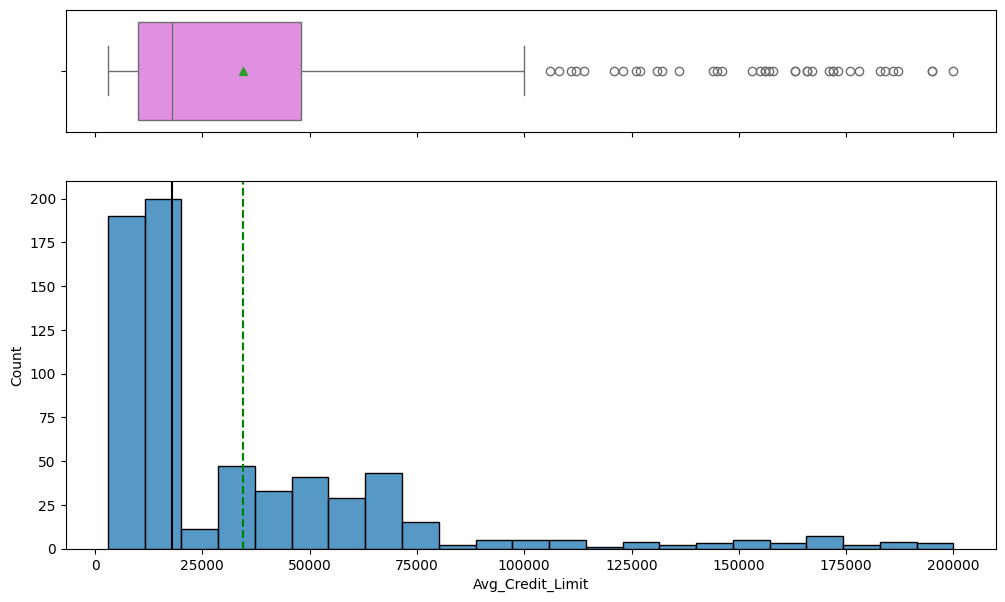

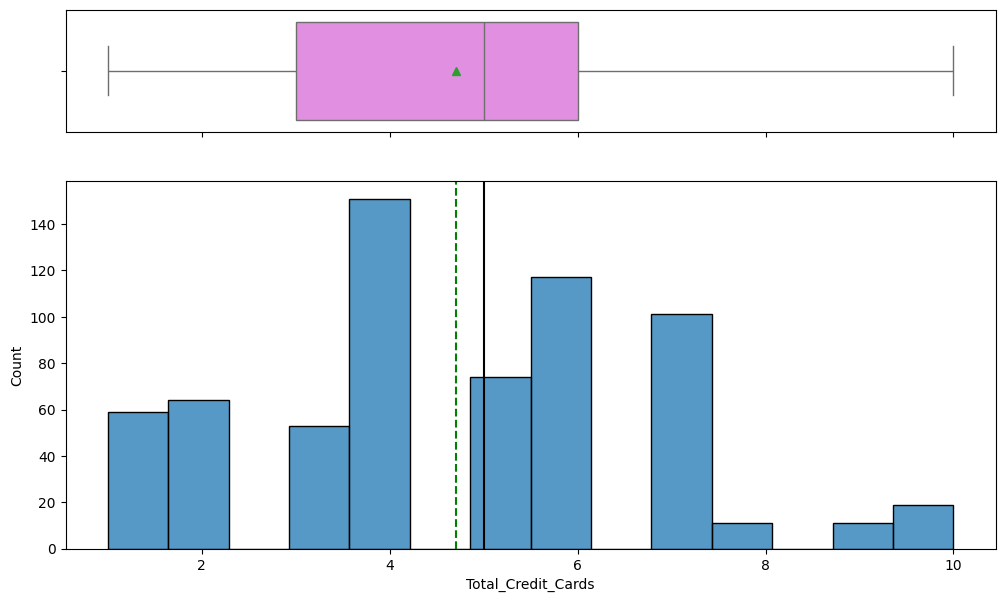

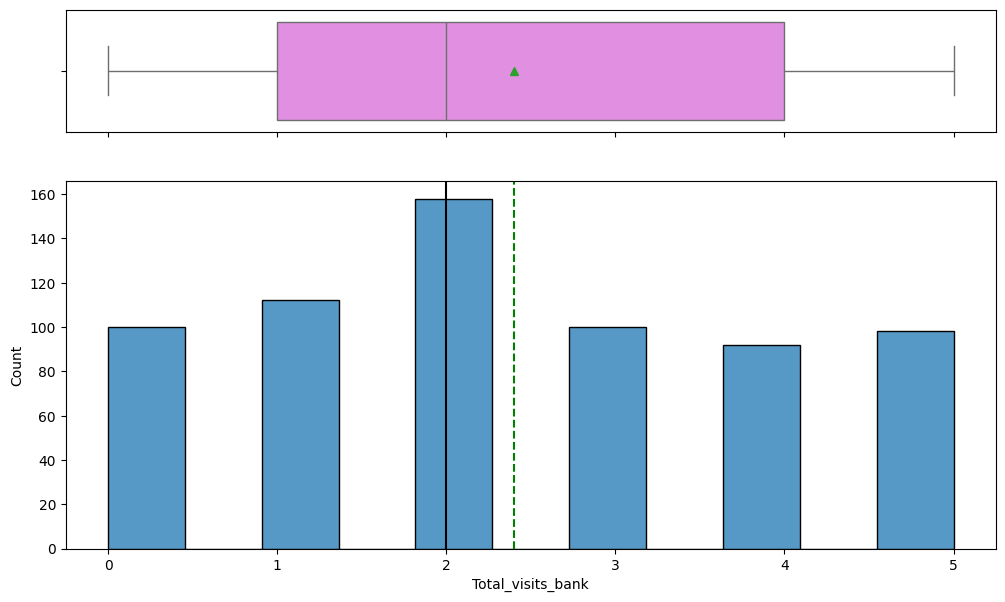

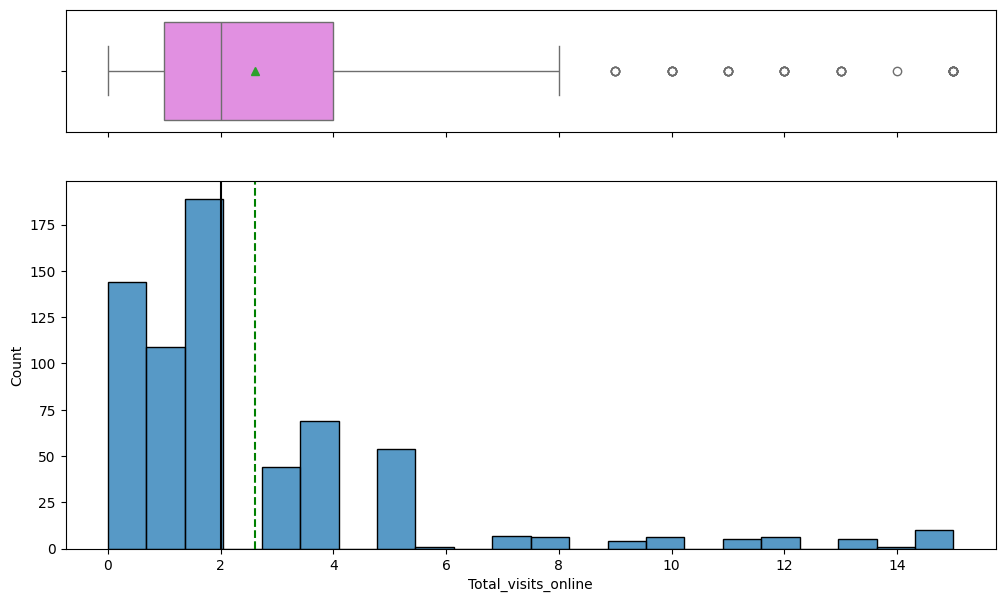

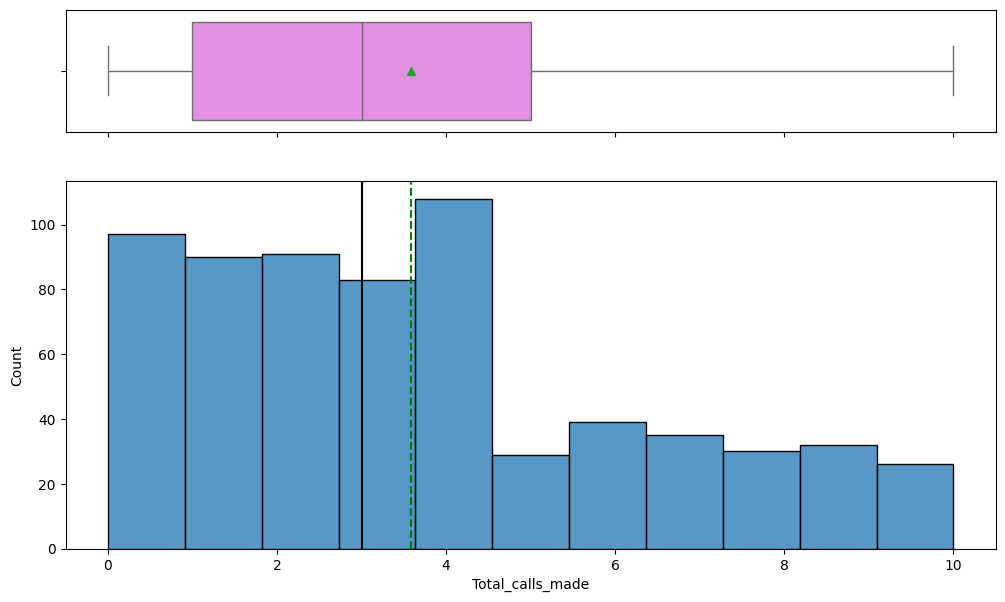

In [194]:
for col in df.columns:
    histogram_boxplot(data, col)

**Observations**

- There are outliers in the *Average_Credit_limit* column, but all the values are continuous, and the gap between the points is evenly distributed.
- In general, customers visit the bank twice a year, log in to the online portal twice a year, and make 3 calls to the customer service.
- We see some outliers in the Total_visits_online column, indicating that few customers log in to the online portal more frequently than the others.

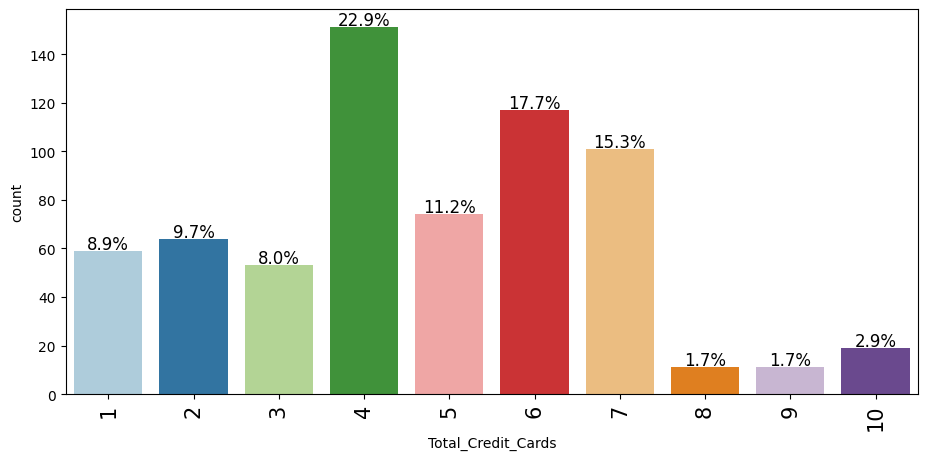

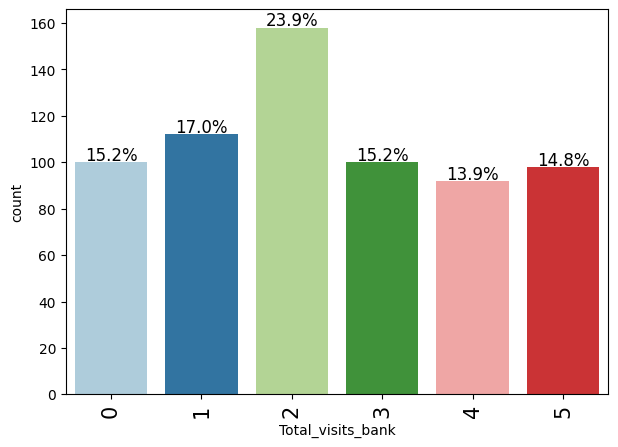

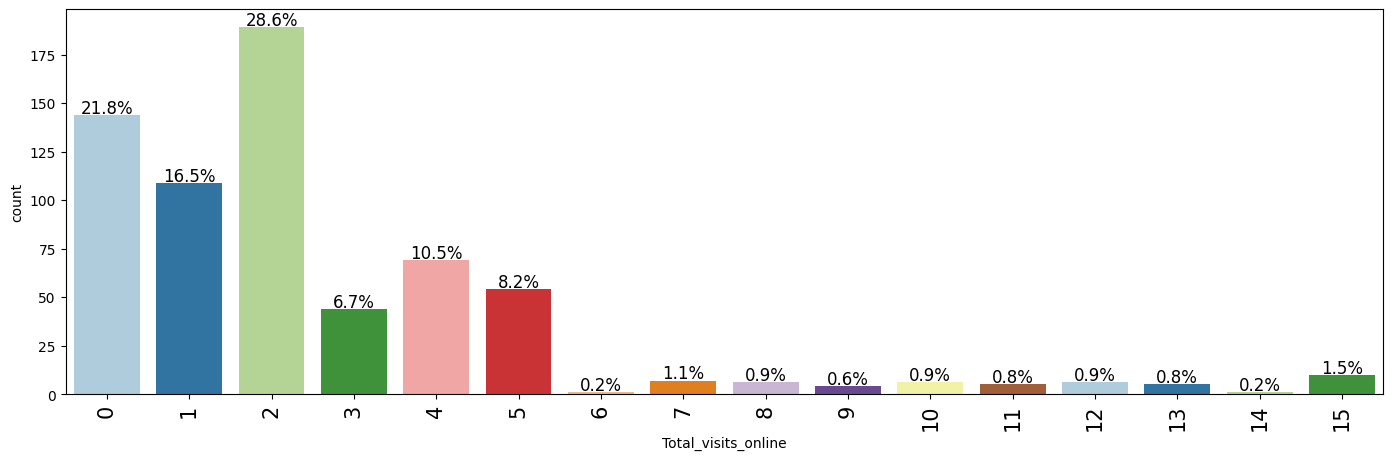

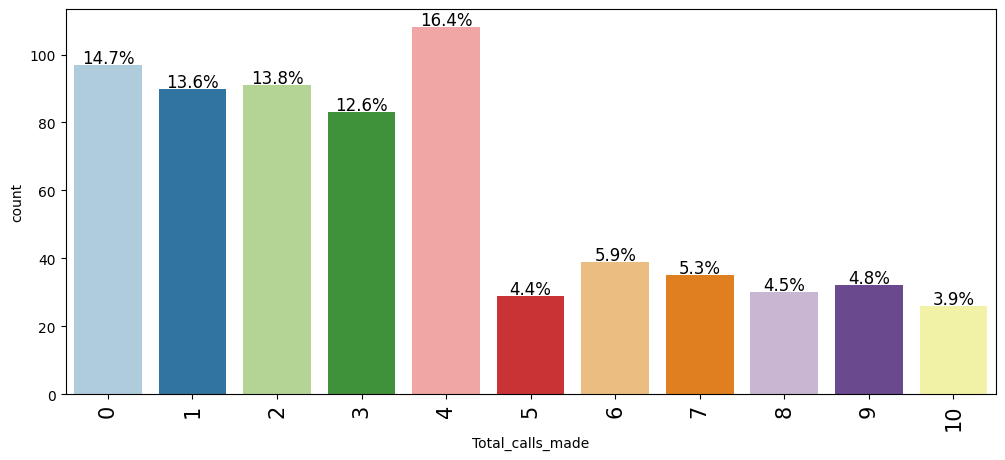

In [195]:
for col in df.columns.tolist()[1:]:
    labeled_barplot(df, col, perc=True)

**Observations**

- Approximately half the customers in the data have 4 or fewer credit cards, and very few customers (approximately 6%) have more than 7 credit cards.
- Approximately 15% of the customers have never visited the bank.
- Approximately 22% of the customers have never logged in to the online portal, while ~7% of the customers used the online banking services more than 6 or more times yearly.
- Approximately 15% of the customers have never made a service-related call to the bank.

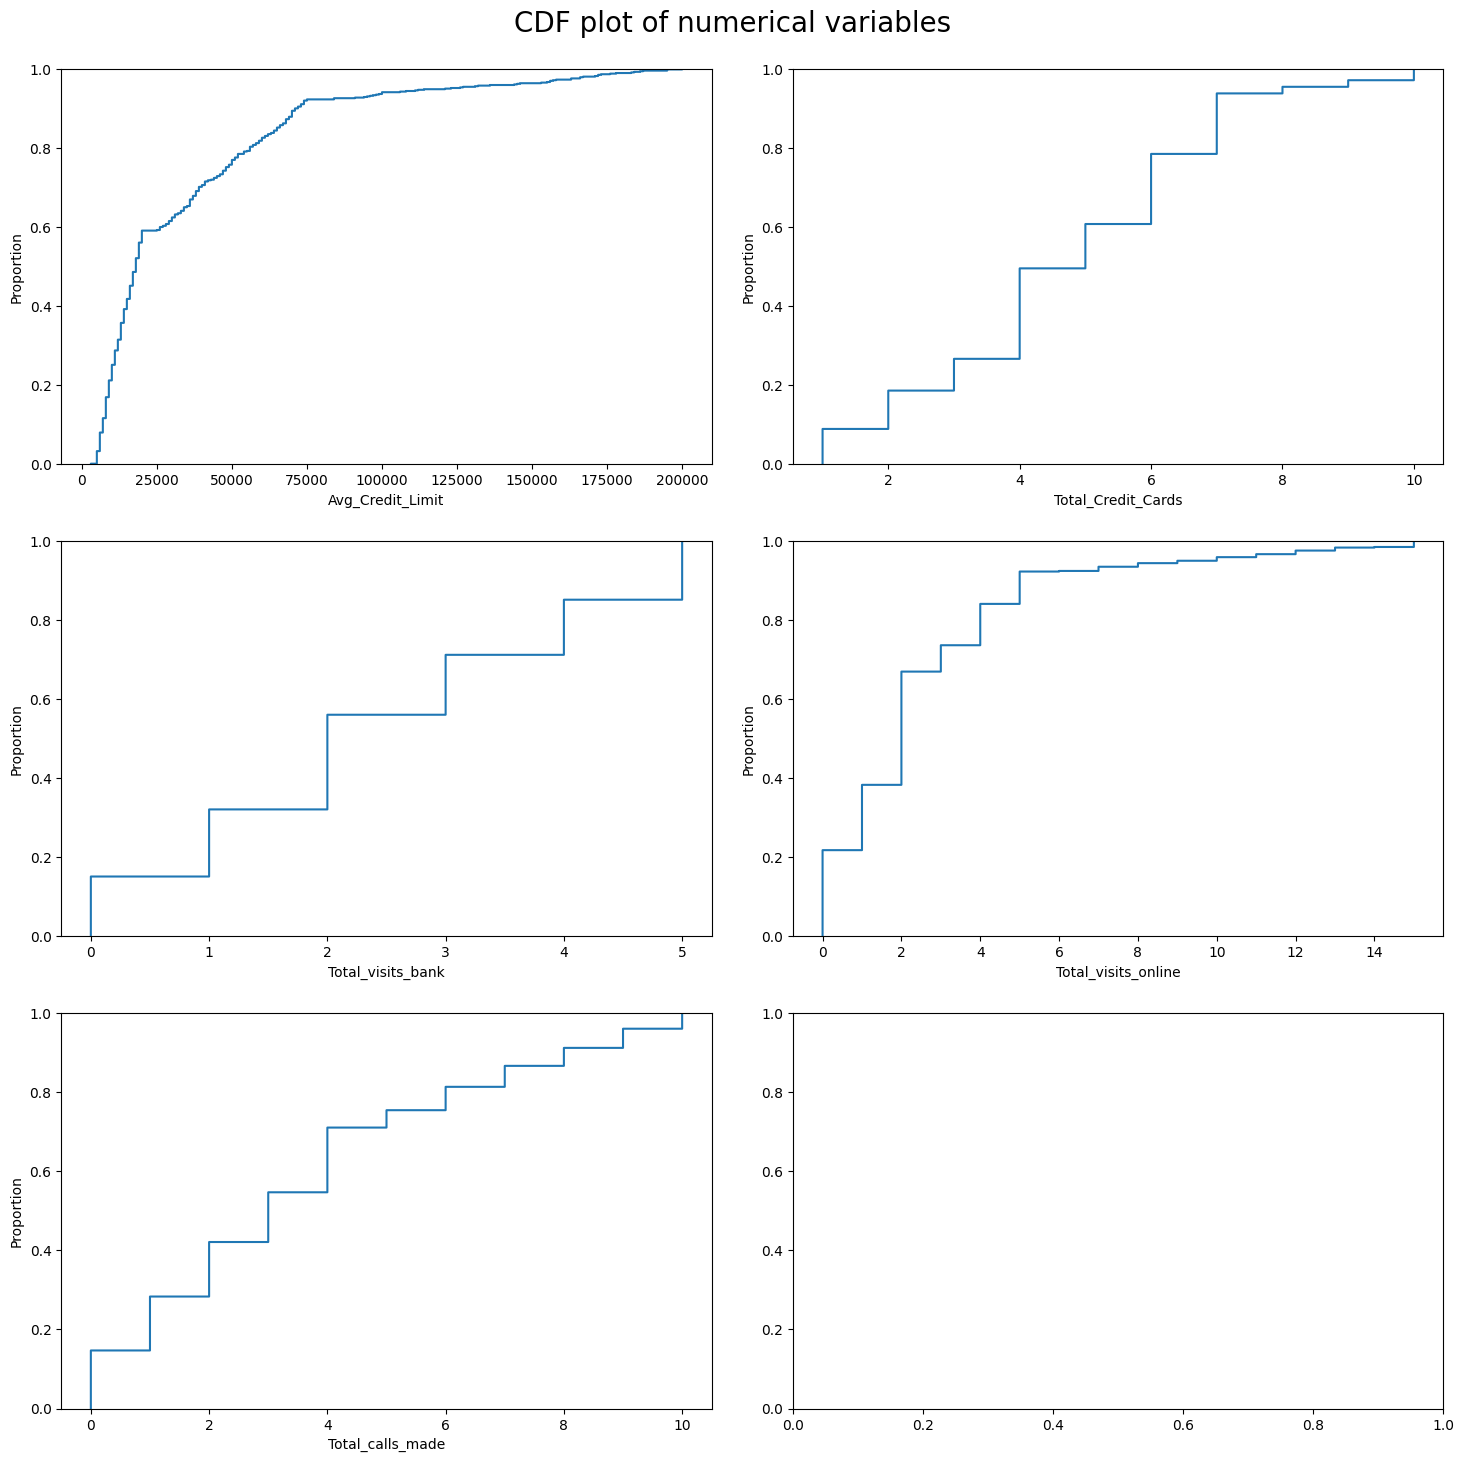

In [196]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=df, ax=axes[ii][0], x=df.columns.tolist()[counter])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(data=df, ax=axes[ii][1], x=df.columns.tolist()[counter])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**

- ~90% of the customers have credit limits of less than 75,000.
- ~90% of the customers have less than 7 credit cards.
- ~85% of the customers visit the bank less than 4 times a year.
- ~90% of the customers visit the online platform 5 times or less a year.
- ~90% of the customers make 8 or fewer calls to the bank a year.

### Bivariate Analysis

**Let's check for correlations.**

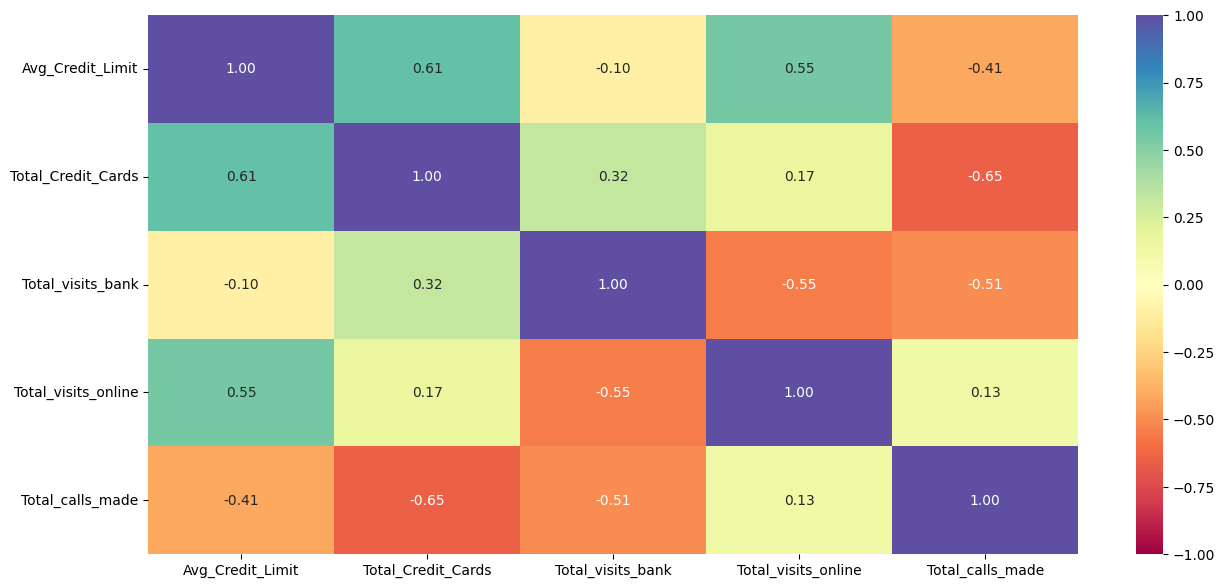

In [197]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

- There is a moderate negative correlation between *Total_Calls_made* and *Total_credit_cards*.
- There is a moderate positive correlation between *Total_credit_cards* and *Avg_credit_limit*, indicating customers with a high average credit limit tend to have more credit cards.

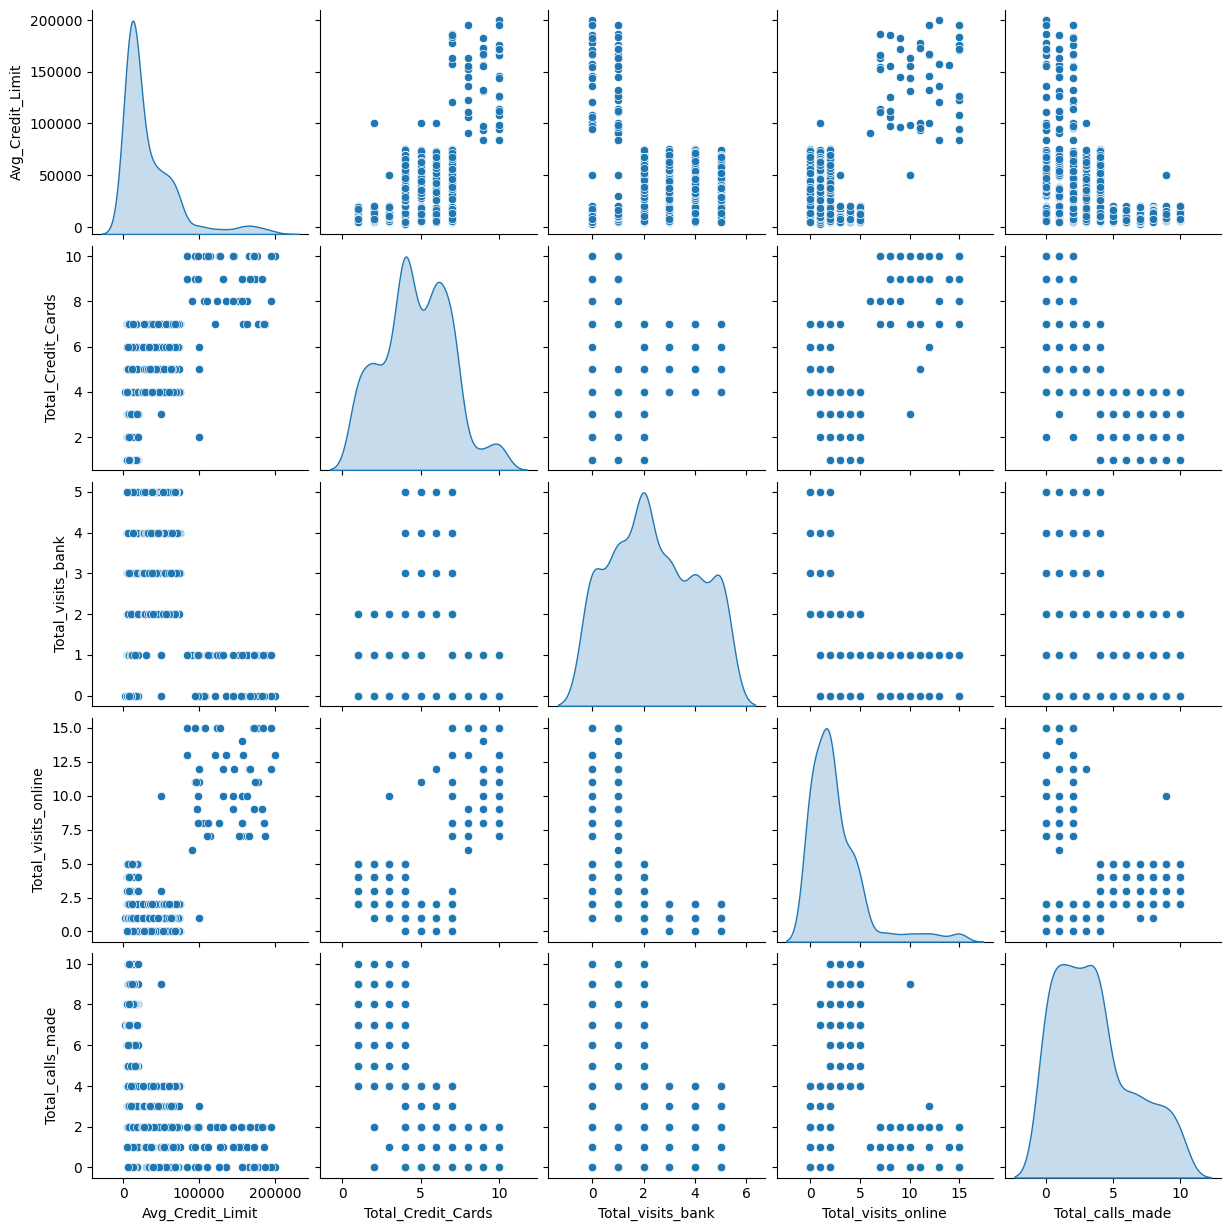

In [198]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**Observations**

- There no clear linear correlation between the variables.
- *Total_credit_cards* may have some clusters formed w.r.t other variables.

**We can add a hue and see if we can see some clustered distributions.**

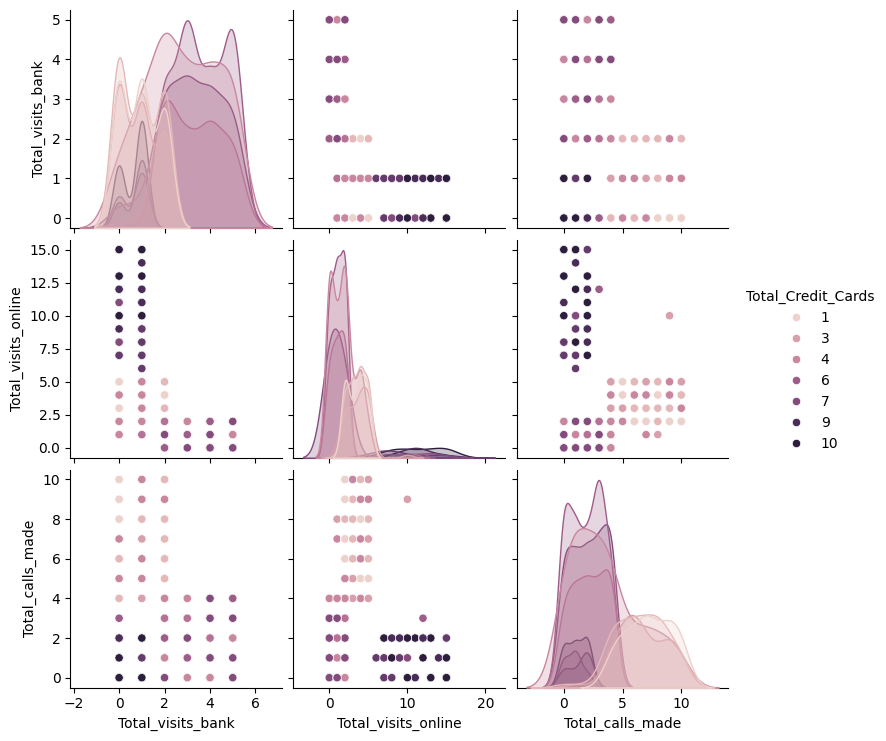

In [199]:
sns.pairplot(
    data=df[
        [
            "Total_visits_bank",
            "Total_visits_online",
            "Total_calls_made",
            "Total_Credit_Cards",
        ]
    ],
    hue="Total_Credit_Cards",
)

plt.show()

**Observations**

- *Total_Credit_Cards* seem to be higher for customers with higher visits online and lesser phone calls made.
- Customers who made more phone calls to the bank seem to have fewer credit cards.

**Let's visualize the modes of contacting the bank in a 3D plot.**

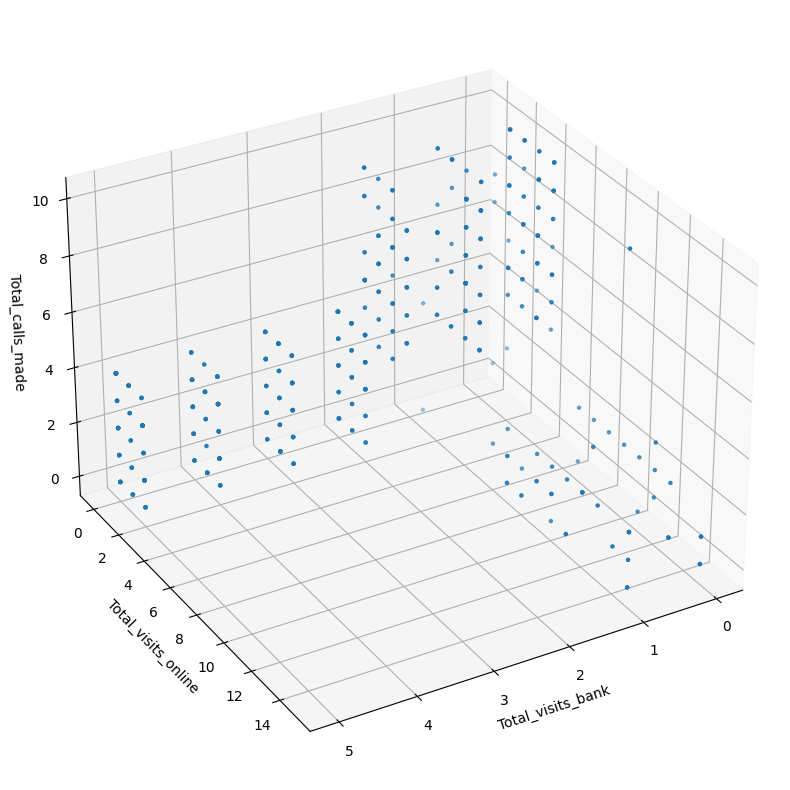

In [200]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["Total_visits_bank"]
y = df["Total_visits_online"]
z = df["Total_calls_made"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("Total_visits_bank")
ax.set_ylabel("Total_visits_online")
ax.set_zlabel("Total_calls_made")
ax.view_init(azim=60)
plt.show()

- We can observe three segments of the customers by their preferred mode of contacting the bank.

## Data Preprocessing

### Outlier Detection



In [201]:
threshold = 3
outlier = {}
for col in df.columns:
    i = df[col]
    mean = np.mean(df[col])
    std = np.std(df[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Avg_Credit_Limit : [153000, 155000, 156000, 156000, 157000, 158000, 163000, 163000, 166000, 166000, 167000, 171000, 172000, 172000, 173000, 176000, 178000, 183000, 184000, 186000, 187000, 195000, 195000, 200000]

 Total_Credit_Cards : []

 Total_visits_bank : []

 Total_visits_online : [12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

 Total_calls_made : []


**Observations**

- There are outliers in the columns *Avg_Credit_Limit* and *Total_Visits_online*.
- We will not treat the outliers as most of those outliers are not disjoint from the curve (continues curve).
- These outliers might also form their own cluster.

### Scaling



In [202]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df.copy()
subset_scaled = scaler.fit_transform(subset)

In [203]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


## Model Building

### K-means Clustering

In [204]:
k_means_df = subset_scaled_df.copy()
k_means_df
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [205]:
clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = sum(
        np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1) ** 2
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**Observations**

- The appropriate value of k from the Elbow curve seems to 3.

**Let's check the silhouette scores.**

In [ ]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

In [ ]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

**Observations**

- The silhouette coefficient for 3 clusters is the highest.
- So, we will proceed with 3 clusters.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(k_means_df)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

## Cluster Profiling

### Cluster Profiling: K-means Clustering

In [ ]:
km_cluster_profile = df1.groupby("K_means_segments").mean()

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [ ]:
# let's display cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
num_col = df1.select_dtypes(include=np.number).columns.to_list()

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(4):
    sns.boxplot(ax=axes[ii], y=df1[num_col[counter]], x=df1["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

Cluster 0:

- Moderate average credit limit.
- Moderate number of total credit cards.
- Moderate number of visits to the bank.
- Low online interactions.
- Moderate number of calls made.
- Contains a relatively large number of customers (386)

Cluster 1:

- Low average credit limit.
- Low number of total credit cards.
- Low number of visits to the bank.
- Moderate online interactions.
- High number of calls made
- Contains a moderate number of customers (224)

Cluster 2:

- High average credit limit.
- High number of total credit cards.
- Very low number of visits to the bank.
- Very high online interactions.
- Very low number of calls made.
- Contains a small number of customers (50)

## Business Insights and Recommendations

**Cluster 0**

Recommendation: Focus on In-Person Services

- Cluster 0 consists of customers who prefer visiting the bank for their banking needs. Since they have an average credit limit and number of credit cards, there is an opportunity to increase revenue by focusing on the volume of customers in this cluster.
- Consider enhancing the in-branch experience, providing personalized assistance, and offering tailored products to meet the needs of these customers who prefer face-to-face interactions.



**Cluster 1**

Recommendation: Incentivize Online Banking

- Premium customers in Cluster 1 have the potential to add more revenue to the bank. To capitalize on this, the bank should run incentives, promotions, and discounts to encourage more customers to adopt online banking and paperless billing.
- Implement marketing campaigns highlighting the benefits of online banking, such as convenience, time-saving, and exclusive offers for premium customers.


**Cluster 2**

Recommendation: Automation and Expansion of online Banking

- Cluster 2 shows a very high level of online interactions, it is essential to invest in and enhance the online customer experience. This could include improving the user interface of online platforms, providing personalized online offers, and ensuring a seamless digital journey.
- Given the high average credit limit in this cluster, consider tailoring credit limit increase offers for customers who fall within similar profiles.
- Consider expanding online banking services to popular chat applications like WhatsApp and Telegram to provide customers with more flexibility and convenience in their interactions.